<a href="https://colab.research.google.com/github/flaviohds/random_codes/blob/main/correlacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O objetivo deste notebook é fazer uma breve observação sobre a correlação entre diferentes distribuições. Mais específicamente, o objetivo é identificar até que ponto os diferentes tipos (Pearson, Kendal, Spearman) conseguem indicar correlações entre distribuições lineares, não lineares e trigonométricas.

In [ ]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def create_dataframe(list1):
  data=[list1,                                        #x
      [3*x for x in list1],                           #3x
      [3*x+100for x in list1],                        #3x+100
      [x**2 for x in list1],                          #x^2
      [x**6 for x in list1],                          #x^6
      [2**x for x in list1],                          #2^x
      [math.exp(x) for x in list1],                   #e^x
      [math.sin(x) for x in list1],                   #sin(x)
      [2*x+x**3-2**x for x in list1],                 #2x+x^3-2^x
      [2*x+x**3-2**x+math.sin(x) for x in list1],     #2x+x^3-2^x+sin(x)     
      [2*x+x**3-2**x+x*math.sin(x) for x in list1],   #2x+x^3-2^x+xsin(x)   
      [2*x+x**3-2**x+20*x*math.sin(x) for x in list1]]#2x+x^3-2^x+20xsin(x)   
  data=np.transpose(data)
  df=pd.DataFrame(data,columns=['X','Xtimes3','3x+100','Xsquare','Xpower6','2powerX',
                                'expX','sinX','formula','formula+sinX',
                                'formula+XsinX','formula+20XsinX'])

  if 0 not in list1:
    df['1overX']=[1/x for x in list1]

  return df

In [ ]:
df=create_dataframe(range(1,11))
df2=create_dataframe(range(1,21))
df

,X,Xtimes3,3x+100,Xsquare,Xpower6,2powerX,expX,sinX,formula,formula+sinX,formula+XsinX,formula+20XsinX,1overX
0,1.0,3.0,103.0,1.0,1.0,2.0,2.718282,0.841471,1.0,1.841471,1.841471,17.829420,1.000000
1,2.0,6.0,106.0,4.0,64.0,4.0,7.389056,0.909297,8.0,8.909297,9.818595,44.371897,0.500000
2,3.0,9.0,109.0,9.0,729.0,8.0,20.085537,0.141120,25.0,25.141120,25.423360,33.467200,0.333333
3,4.0,12.0,112.0,16.0,4096.0,16.0,54.598150,-0.756802,56.0,55.243198,52.972790,-4.544200,0.250000
4,5.0,15.0,115.0,25.0,15625.0,32.0,148.413159,-0.958924,103.0,102.041076,98.205379,7.107573,0.200000
5,6.0,18.0,118.0,36.0,46656.0,64.0,403.428793,-0.279415,164.0,163.720585,162.323507,130.470140,0.166667
6,7.0,21.0,121.0,49.0,117649.0,128.0,1096.633158,0.656987,229.0,229.656987,233.598906,320.978124,0.142857
7,8.0,24.0,124.0,64.0,262144.0,256.0,2980.957987,0.989358,272.0,272.989358,279.914866,430.297319,0.125000
8,9.0,27.0,127.0,81.0,531441.0,512.0,8103.083928,0.412118,235.0,235.412118,238.709066,309.181327,0.111111
9,10.0,30.0,130.0,100.0,1000000.0,1024.0,22026.465795,-0.544021,-4.0,-4.544021,-9.440211,-112.804222,0.100000


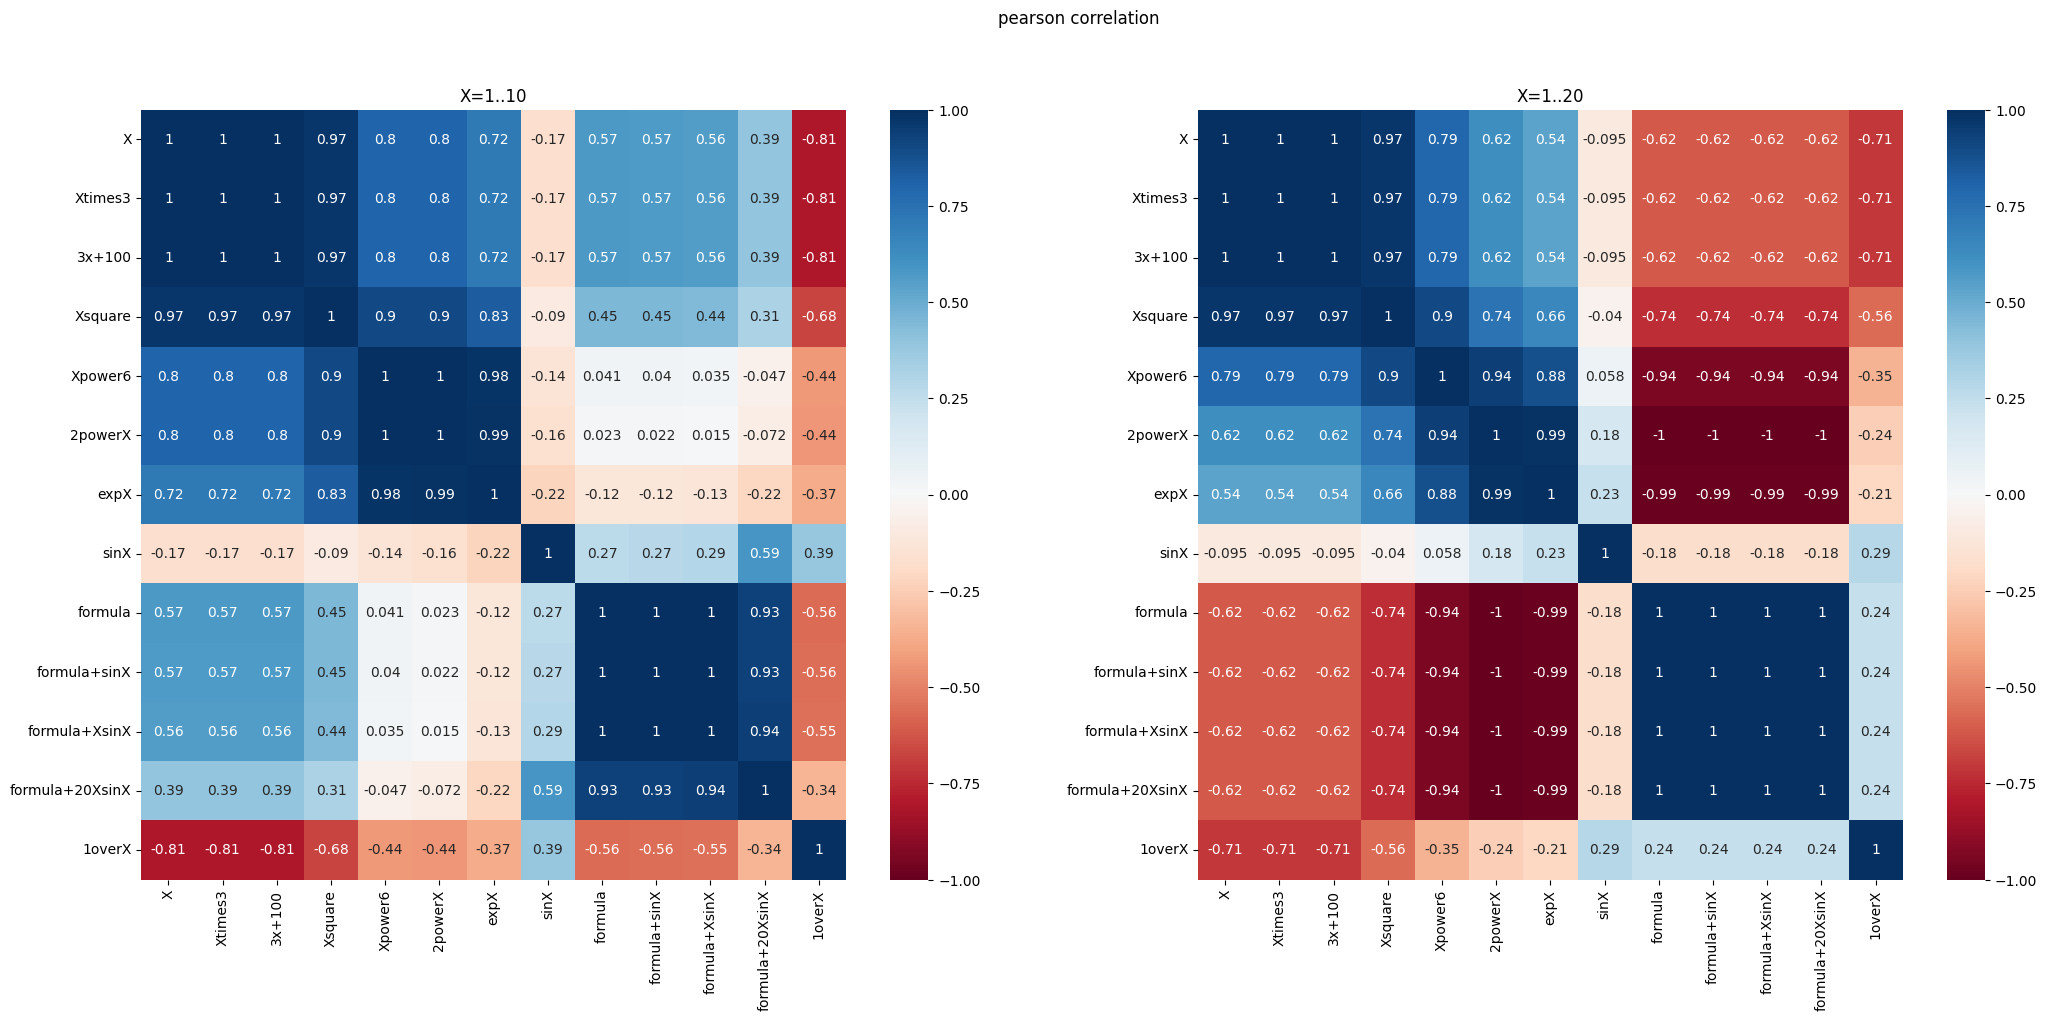

In [ ]:
fig2,(ax1,ax2)=plt.subplots(1,2,figsize=(25,10))

fig2.suptitle('pearson correlation')

sns.heatmap(df.corr(method='pearson'),ax=ax1,annot=True,cmap='RdBu',vmin=-1,vmax=1)
ax1.set_title('X=1..10')
sns.heatmap(df2.corr(method='pearson'),ax=ax2,annot=True,cmap='RdBu',vmin=-1,vmax=1)
ax2.set_title('X=1..20')

plt.show()

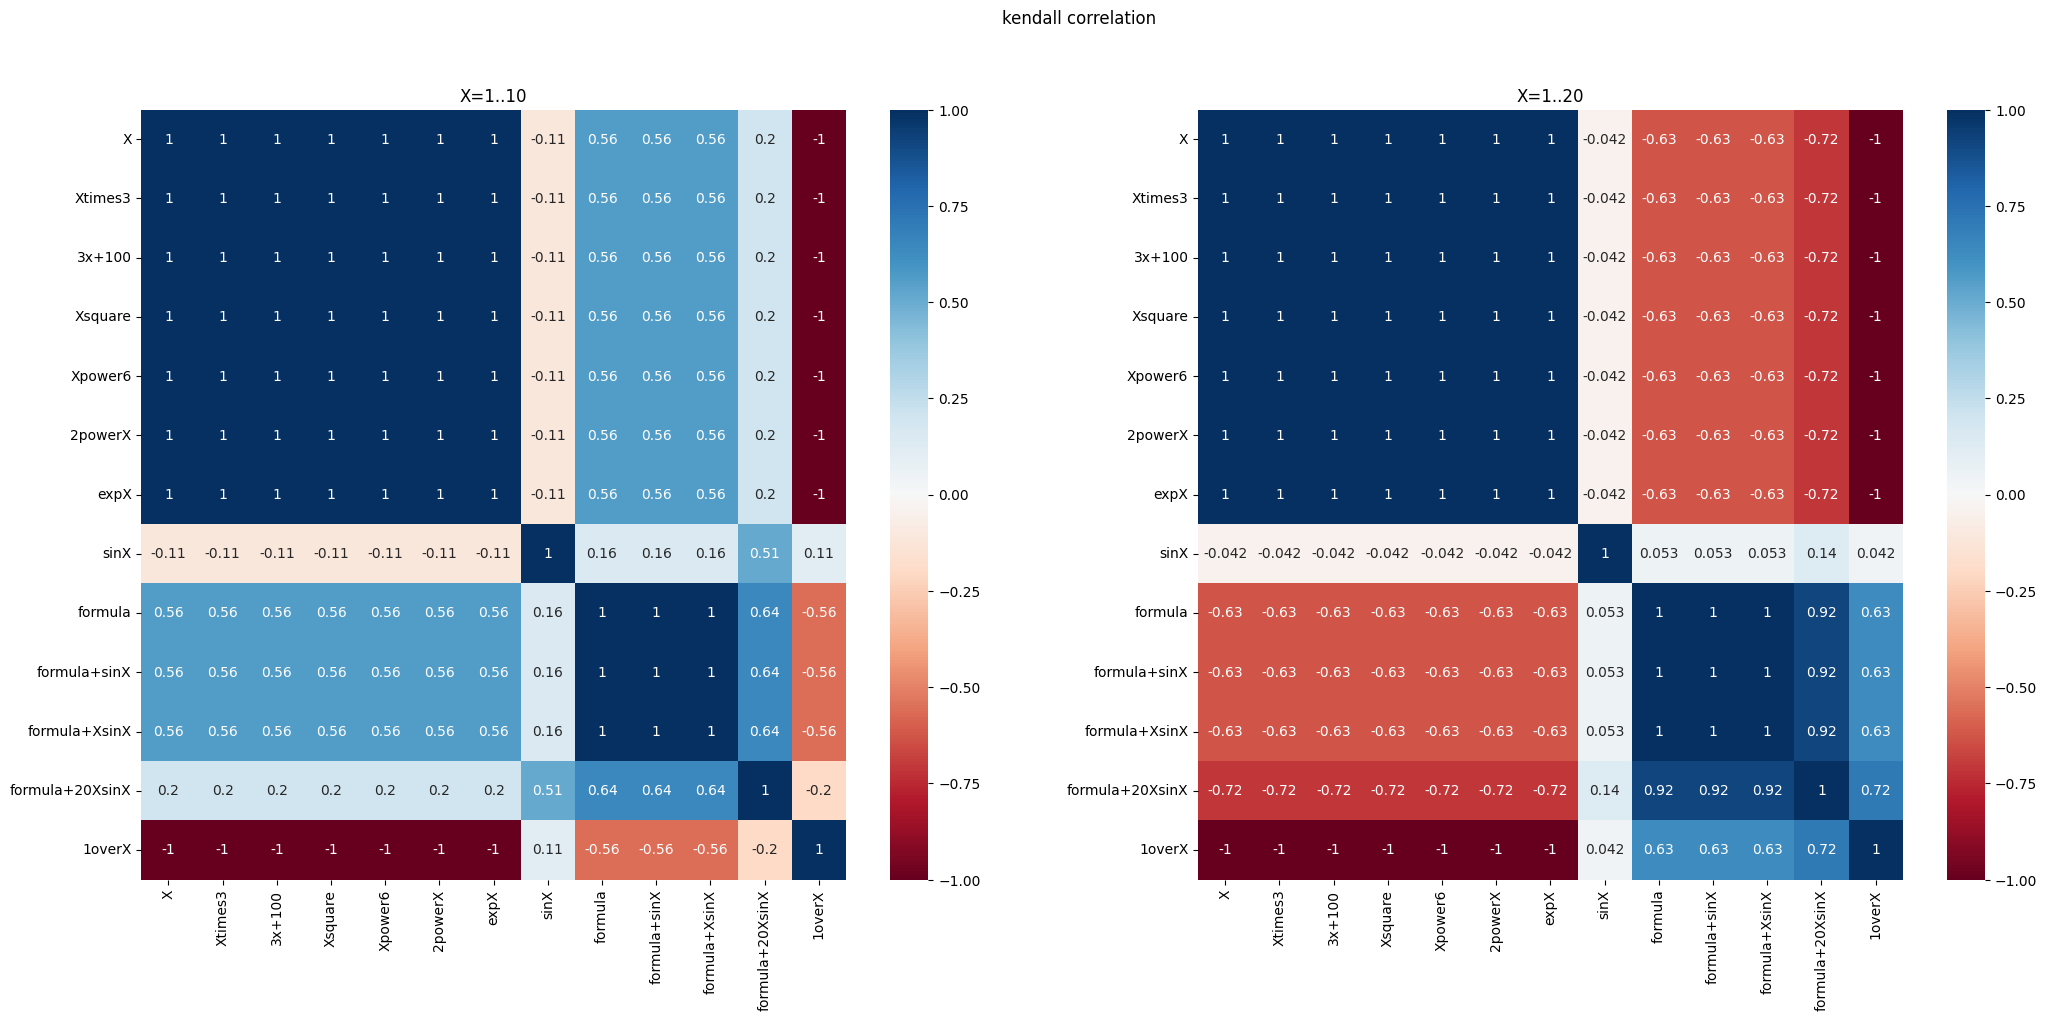

In [ ]:
fig2,(ax1,ax2)=plt.subplots(1,2,figsize=(25,10))

fig2.suptitle('kendall correlation')

sns.heatmap(df.corr(method='kendall'),ax=ax1,annot=True,cmap='RdBu',vmin=-1,vmax=1)
ax1.set_title('X=1..10')
sns.heatmap(df2.corr(method='kendall'),ax=ax2,annot=True,cmap='RdBu',vmin=-1,vmax=1)
ax2.set_title('X=1..20')

plt.show()

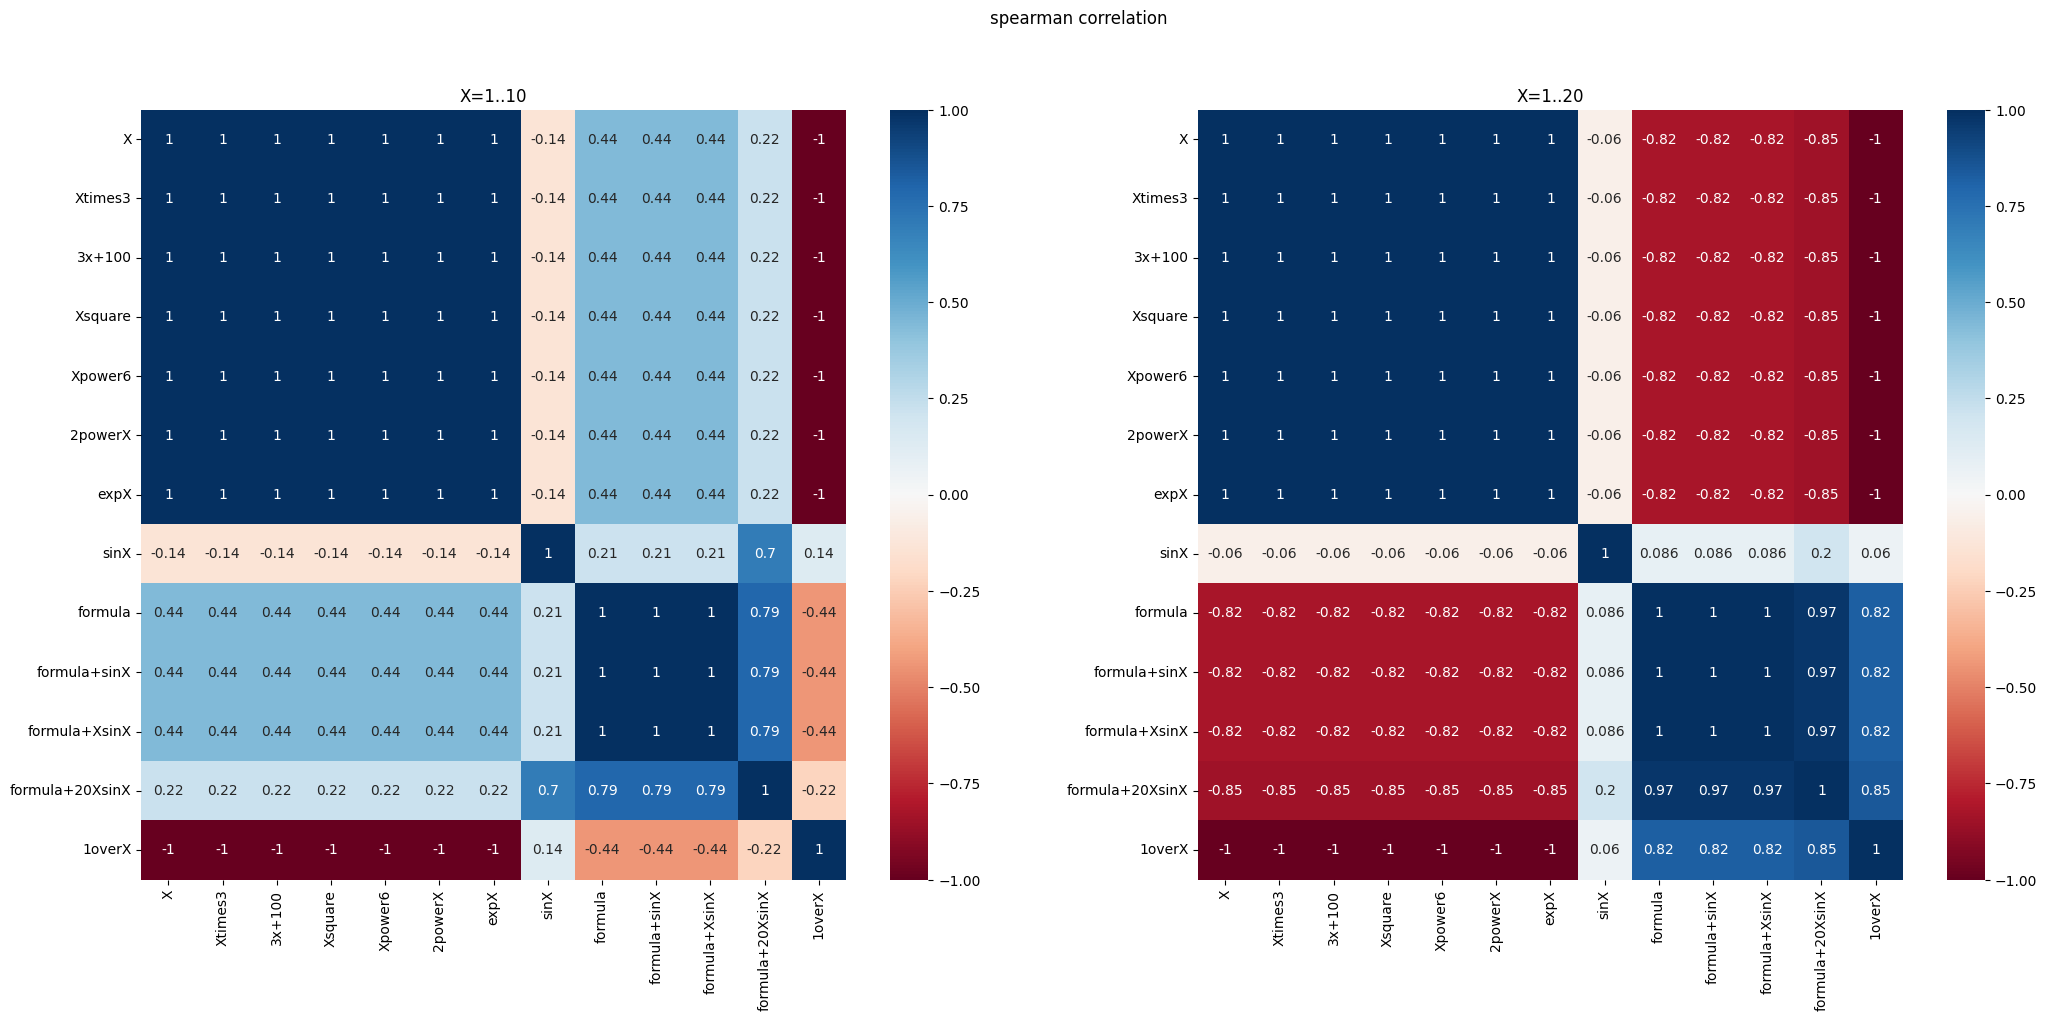

In [ ]:
fig2,(ax1,ax2)=plt.subplots(1,2,figsize=(25,10))

fig2.suptitle('spearman correlation')

sns.heatmap(df.corr(method='spearman'),ax=ax1,annot=True,cmap='RdBu',vmin=-1,vmax=1)
ax1.set_title('X=1..10')
sns.heatmap(df2.corr(method='spearman'),ax=ax2,annot=True,cmap='RdBu',vmin=-1,vmax=1)
ax2.set_title('X=1..20')

plt.show()

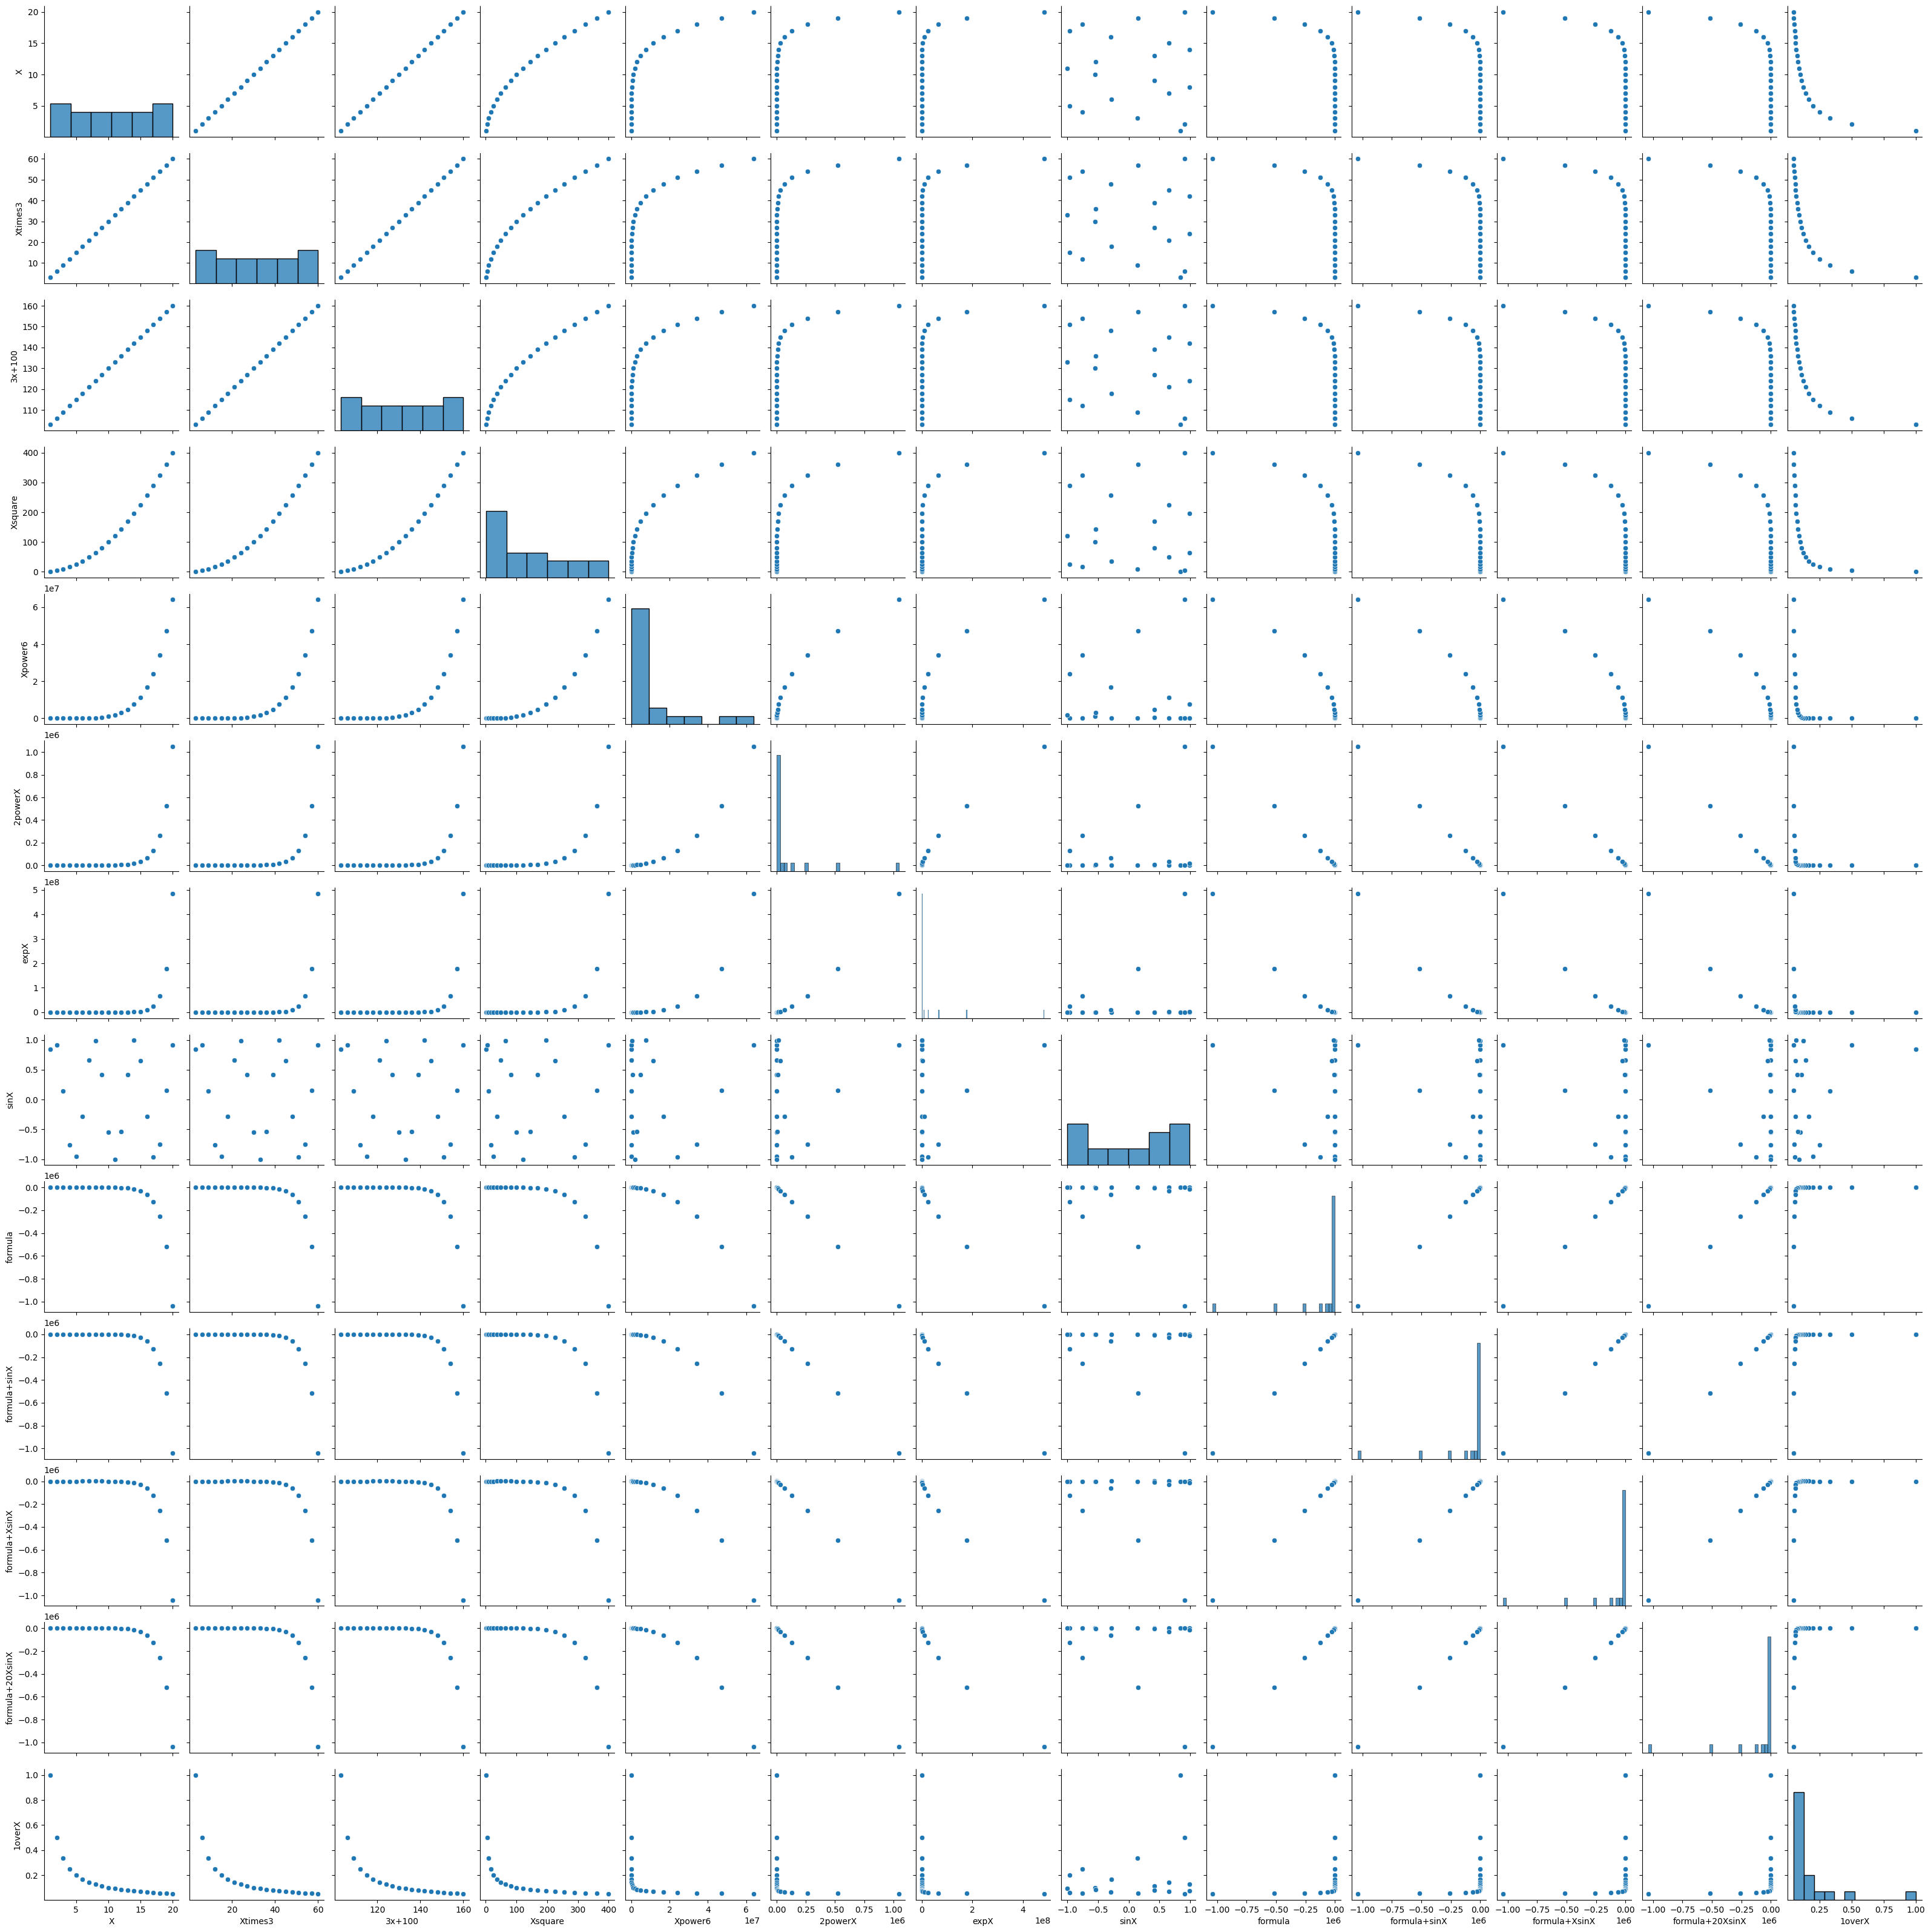

In [ ]:
sns.pairplot(df2)

In [ ]:
#add noise
#change order of X